In [207]:
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt

In [208]:
clima = pd.read_csv('data/medidas_clima.csv', parse_dates=['date'])

In [209]:
clima['Año'] = clima['date'].dt.year

In [210]:
clima = clima[clima['Año'] > 2000]

In [211]:
resumen_anual = clima.groupby('Año').mean()
resumen_anual.reset_index(drop=False, inplace=True)

In [212]:
resumen_anual

,Año,value
0,2001,24.876667
1,2002,25.015000
2,2003,25.090833
3,2004,24.914167
4,2005,25.004167
5,2006,24.870833
6,2007,24.804167
7,2008,24.520000
8,2009,24.978333
9,2010,25.203333


In [213]:
perdida_cobertura = pd.read_csv('assets/treecover_loss__ha.csv')
perdida_cobertura.drop(columns='iso', inplace=True)


In [214]:
perdida_cobertura = perdida_cobertura.iloc[:, range(2)]

In [215]:
perdida_cobertura.columns = ['Año', 'value']

In [216]:
perdida_cobertura['value'] = (perdida_cobertura['value'] - perdida_cobertura['value'].mean())/perdida_cobertura['value'].std()


In [217]:
intervencion = pd.read_csv('assets/arboles.txt', sep=": ", thousands=",")

C:\Users\SantiagoFranco\AppData\Local\Temp\ipykernel_8452\1730083137.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  intervencion = pd.read_csv('assets/arboles.txt', sep=": ", thousands=",")


In [218]:
intervencion

,Año,Cantidad
0,2002,63302
1,2003,32050
2,2004,81695
3,2005,58906
4,2006,56051
5,2007,95539
6,2008,83619
7,2009,65824
8,2010,68739
9,2011,72601


<AxesSubplot: >

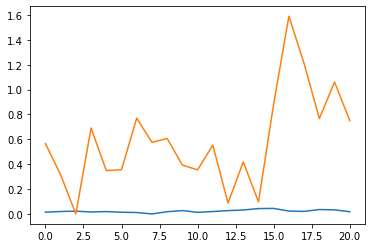

In [219]:
perdida_cobertura['value'] = (perdida_cobertura['value'] - perdida_cobertura['value'].min())/perdida_cobertura['value'].max()
resumen_anual['value'] = (resumen_anual['value'] - resumen_anual['value'].min())/ resumen_anual['value'].max()


resumen_anual['value'].plot()
perdida_cobertura['value'].plot()


In [220]:
perdida_cobertura['value'].max()

1.5903181195838894

In [221]:
base_modelo = resumen_anual.copy()
base_modelo = base_modelo[base_modelo['Año'] >2001 & base_modelo['Año'] < 2021]
base_modelo['aux'] = perdida_cobertura['value']
base_modelo['aux2'] = intervencion['Cantidad']

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
base_modelo.corr()

,Año,value,aux
Año,1.000000,0.532240,0.511427
value,0.532240,1.000000,0.015516
aux,0.511427,0.015516,1.000000
